<a href="https://colab.research.google.com/github/Hikanyona/Mytest/blob/master/Atna_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DDM 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 8)

In [0]:
data = pd.read_csv("/content/drive/My Drive/NVE/atna.csv", sep=';', header='infer',
                   dayfirst=True,
                   index_col=0, # you can use the date as the index for pandas
                   parse_dates=[0]) # where is the time stamp?)
data.head()
#data['Date']
#plt.plot(data['Date'], data['Q'])  # did not work for TS
#data.plot(y='P')
#fig, ax=plt.subplot(3, sharex='all')
#ax[0].data.plot(y='P') # did not work for TS
#ax[1].data.plot(y='T') # did not work for TS
#ax[2].data.plot(y='Q') # did not work for TS

,P,T,Q
Date,,,
1981-01-01,0.43,-7.91,4.136
1981-01-02,0.33,-8.25,3.955
1981-01-03,0.00,-13.08,3.955
1981-01-04,0.03,-18.60,3.778
1981-01-05,0.00,-22.87,3.778


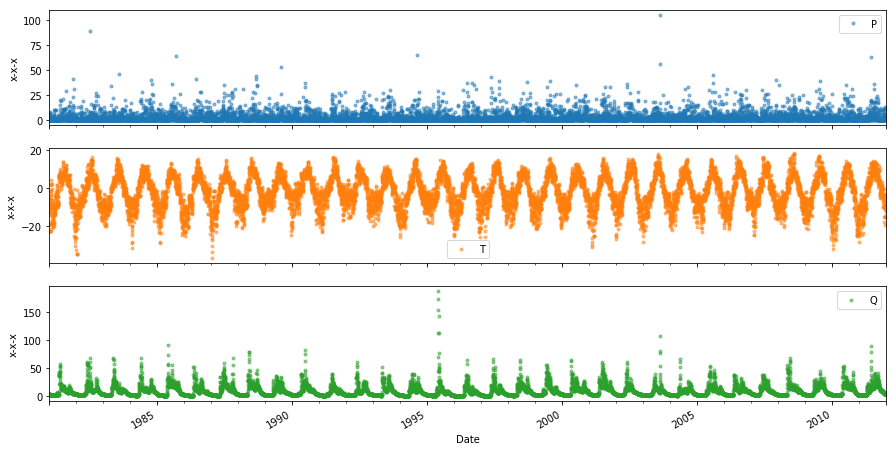

In [7]:
cols_plot = [ 'P', 'T', 'Q']

axes =data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('x-x-x')
    #data['1995']

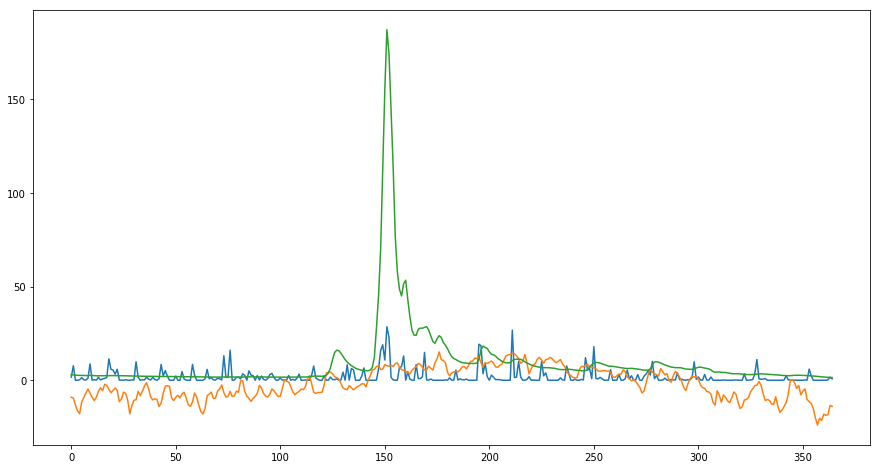

In [16]:
data_1995 = data['1995'].to_numpy()
data_1995.shape
plt.plot(data_1995)


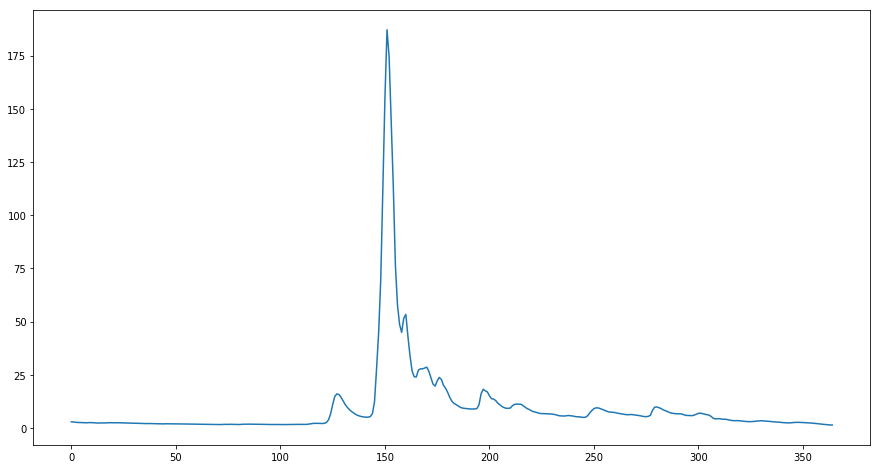

In [17]:
data_1995Q = data['1995']['Q'].to_numpy()
plt.plot(data_1995Q)

#data_1995 =data['1995'].to_numpy()
#data_1995.shape
#data_1995pd = pd.DataFrame(data=data_1995.flatten())
#data_1995pd.plot() #plots all series in one
#plt.plot(data_1995) #plots 3 series
#data_1995[0:6]
#plt.plot(data_1995) #pandas

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
#values = data.to_numpy()
#data_1995.shape
#n_steps_in, n_steps_out, n_features = 9, 1, 3

In [0]:
#@title Prediction from n days to m days

n_steps_in = 75 #@param {type:"slider", min:1, max:100, step:1}
n_steps_out = 75 #@param {type:"slider", min:1, max:100, step:1}

In [0]:
#plt.plot(values[5250:5270])

In [39]:
X, Y = split_sequence(data_1995Q, n_steps_in, n_steps_out)
X.shape, Y.shape

((216, 75), (216, 75))

In [40]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
Y = Y.reshape((Y.shape[0], Y.shape[1], n_features))
X.shape, Y.shape

((216, 75, 1), (216, 75, 1))

In [41]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

2.0.0-rc1


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import RepeatVector, Input

ENCODER_SIZE = 128
DECODER_SIZE = 128

ENCODING_DIM = 256

model = Sequential()

# ENCODER

model.add(Input(shape=(n_steps_in, n_features), name='Input'))


# model.add(LSTM(units=ENCODER_SIZE, activation='relu', name="encode1r", return_sequences=True))
model.add(LSTM(units=ENCODER_SIZE, activation='relu', name="encoder2"))


# LATENT SPACE

model.add(Dense(units=ENCODING_DIM, activation='relu', name="latent_space1"))
model.add(Dense(units=ENCODING_DIM, activation='relu', name="latent_space2"))

# DECODER

model.add(RepeatVector(n_steps_out))

# return_sequences=True tells it to keep all temporal outputs, not only the final one (we need all of them for our predicted sequence)
model.add(LSTM(units=DECODER_SIZE, activation='relu', return_sequences=True, name="decoder"))

model.add(Dense(units=1))
optimizer = Adam(lr=1e-3)
model.compile(optimizer=optimizer, loss='mse')
# model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder2 (LSTM)              (None, 128)               66560     
_________________________________________________________________
latent_space1 (Dense)        (None, 256)               33024     
_________________________________________________________________
latent_space2 (Dense)        (None, 256)               65792     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 75, 256)           0         
_________________________________________________________________
decoder (LSTM)               (None, 75, 128)           197120    
_________________________________________________________________
dense_1 (Dense)              (None, 75, 1)             129       
Total params: 362,625
Trainable params: 362,625
Non-trainable params: 0
________________________________________________

In [43]:
# What kind of GPU are we running on
!nvidia-smi

Thu Sep 26 12:58:36 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    59W / 149W |    280MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

CPU times: user 2min 9s, sys: 10.5 s, total: 2min 19s
Wall time: 1min 32s


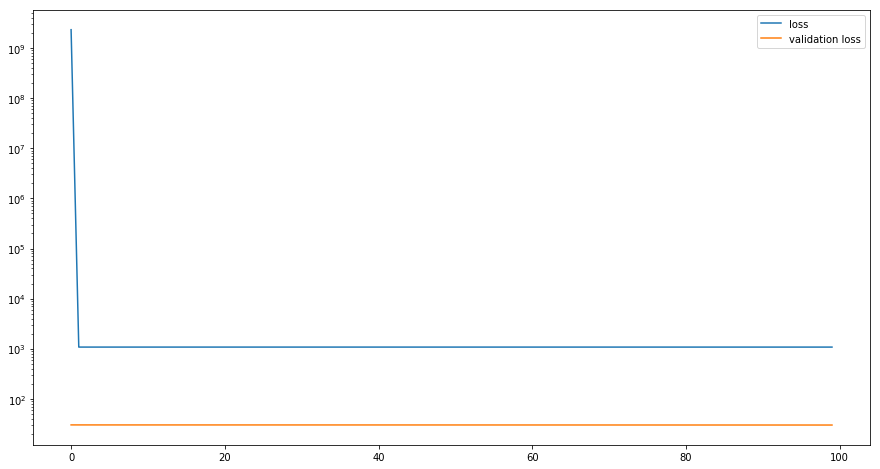

In [44]:
%%time

EPOCHS = 100
BATCH_SIZE = 50

history = model.fit(X, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0, validation_split=0.2)

plt.yscale('log')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['loss', 'validation loss'])


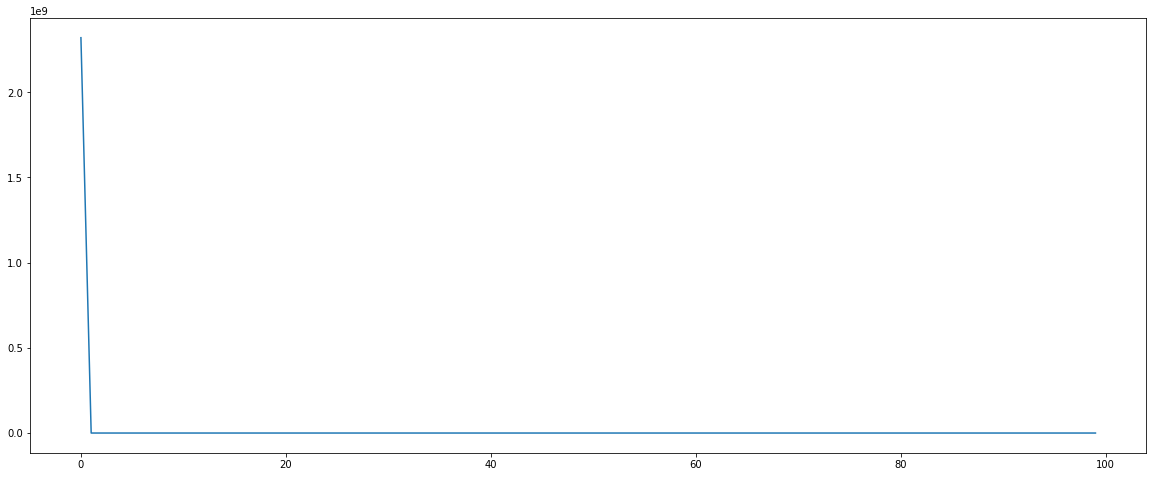

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

#plt.yscale('log')
plt.plot(history.history['loss'])

In [0]:
final = X[-2]
final

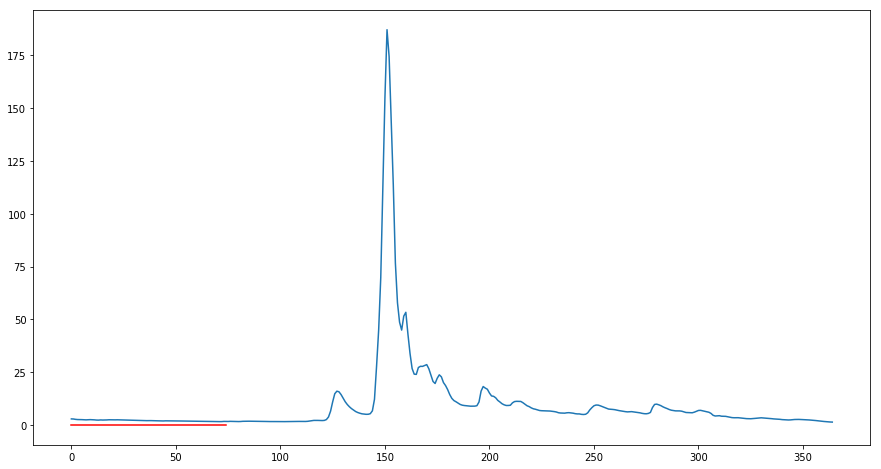

In [55]:

start_period = X[-1]
start_period_pred = model.predict(start_period.reshape(1, -1, 1))
#
plt.plot(data_1995Q)
plt.plot(start_period_pred[0], color='r');

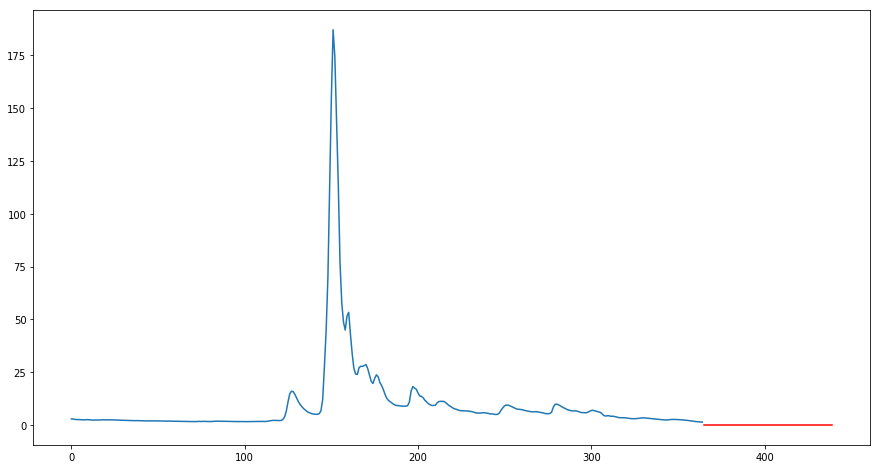

In [56]:

known_x = np.arange(len(data_1995Q))
pred_x = np.arange(len(data_1995Q), len(data_1995Q) + n_steps_out)

plt.plot(known_x, data_1995Q)
plt.plot(pred_x, start_period_pred[0], color='r');

In [0]:
Y[-1]

array([  0.7  , -13.96 ,   1.415])